In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.82'

In [2]:
df_R=pd.read_excel('Raman_session_February 6, 2024_fitted_2024-02-06.xlsx')
df_TM=pd.read_excel('TMdata.xlsx')

In [3]:
df_TM['extracted_name']=df_TM['Sample'].str.split('_', n=1).str[1]
df_TM['extracted_name']

0     p3_FI1
1     p3_FI2
2     p3_FI3
3     p3_FI4
4     p1_FI1
5     p1_FI2
6     p1_FI3
7     p4_FI1
8     p4_FI2
9     c1_FI1
10    c1_FI2
11    c1_FI3
12    p2_FI1
13    p2_FI2
14    p2_FI3
15    p2_FI4
16    p2_FI5
Name: extracted_name, dtype: object

In [4]:
df_R['filename']
df_R['extracted_name'] = df_R['filename'].apply(lambda x: '_'.join(x.split('_')[:2]))
df_R['extracted_name'] 

0     p3_FI4
1     p3_FI2
2     p3_FI2
3     p3_FI3
4     p3_FI1
5     c1_FI2
6     c1_FI1
7     c1_FI4
8     c1_FI5
9     p2_FI1
10    p2_FI5
11    p2_FI2
12    p2_FI6
Name: extracted_name, dtype: object

In [5]:
df_combo=pd.merge(df_R, df_TM, how='outer', on='extracted_name').reset_index(drop=True)
df_combo

,Unnamed: 0_x,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,...,Run,corrected_Th_low,corrected_Th_high,corrected_Tm_low,corrected_Tm_high,corrected_Th_low_CO2dens_gcm3,corrected_Th_high_CO2dens_gcm3,Mean_Bulk_CO2dens_gcm3,Range_Bulk_CO2dens_gcm3,avMelt
0,2.0,p3_FI4_50x_8mW_down,1.001573,0.002626,0.002079,0.001604,105.181610,0.007605,0.001337,0.007503,...,1.0,-14.931907,-14.831016,-56.801783,-56.700891,1.007630,1.007138,1.007384,0.000492,-56.45
1,3.0,p3_FI2_100x_8mW,0.996054,0.004616,0.004329,0.001603,105.161581,0.015588,0.001307,0.015567,...,1.0,-14.730125,-14.629234,-56.902674,-56.801783,1.006645,1.006152,1.006399,0.000493,-56.55
2,4.0,p3_FI2_100x_12mW,0.995077,0.003743,0.003383,0.001602,105.158070,0.012147,0.001299,0.012104,...,1.0,-14.730125,-14.629234,-56.902674,-56.801783,1.006645,1.006152,1.006399,0.000493,-56.55
3,5.0,p3_FI3_100x_12mW,0.996737,0.002331,0.001693,0.001603,105.164045,0.006108,0.001283,0.005985,...,1.0,-16.445276,-16.344385,-57.306239,-57.205348,1.014941,1.014457,1.014699,0.000484,-56.95
4,6.0,p3_FI1_100x_12mW,0.736630,0.002347,0.001714,0.001604,104.432141,0.003953,0.001248,0.003759,...,1.0,-14.730125,-14.629234,-56.801783,-56.700891,1.006645,1.006152,1.006399,0.000493,-56.45
5,7.0,c1_FI2_50X_8mW,0.993200,0.001990,0.001181,0.001602,105.151346,0.004220,0.001256,0.004037,...,2.0,-16.949733,-16.848841,-64.469519,-59.828520,1.017351,1.016870,1.017111,0.000481,-61.80
6,8.0,c1_FI1_100X_12mW,0.990061,0.003004,0.002542,0.001601,105.140180,0.009004,0.001259,0.008935,...,2.0,-17.151515,-17.050624,-64.469519,-59.828520,1.018312,1.017832,1.018072,0.000480,-61.80
7,9.0,c1_FI4_50X_8mW,0.994357,0.003215,0.002788,0.001602,105.155486,0.009991,0.001262,0.009933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,c1_FI5_50X_8mW,0.101282,0.004451,0.002308,0.003806,103.005862,0.005824,0.001244,0.005702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,p2_FI1_50X_8mW,1.001140,0.002155,0.001439,0.001604,105.180028,0.005255,0.001321,0.005097,...,2.0,-15.839929,-15.739037,-57.205348,-57.104456,1.012031,1.011544,1.011787,0.000487,-56.85


(0.95, 1.05)

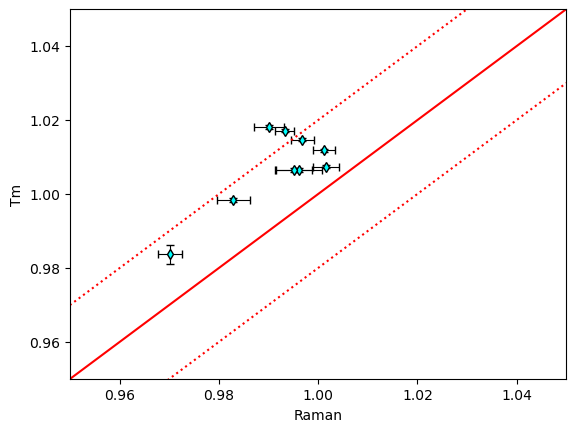

In [6]:
plt.errorbar(df_combo['Density g/cm3'], df_combo['Mean_Bulk_CO2dens_gcm3'], 
             xerr=df_combo['σ Density g/cm3'], yerr=df_combo['Range_Bulk_CO2dens_gcm3'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3)
plt.plot([0.9, 1.05], [0.9, 1.05], '-r')
sig=0.02
plt.plot([0.9, 1.05], [0.9+sig, 1.05+sig],':r')
plt.plot([0.9, 1.05], [0.9-sig, 1.05-sig],':r')
plt.xlabel('Raman')
plt.ylabel('Tm')

plt.xlim([0.95, 1.05])
plt.ylim([0.95, 1.05])

Text(0.5, 0, 'Melting Temp')

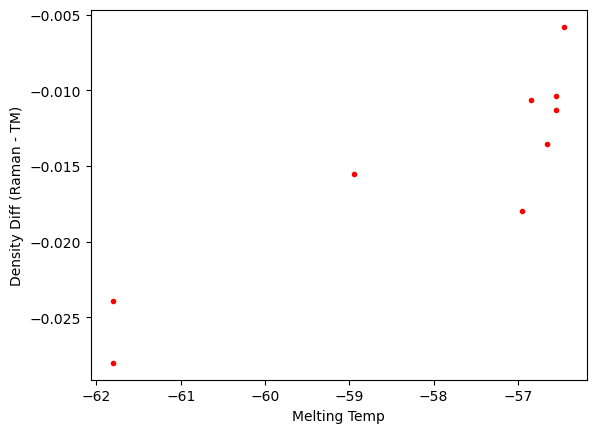

In [10]:
plt.plot(df_combo['avMelt'].loc[~outlier], df_combo['Density g/cm3'].loc[~outlier]-df_combo['Mean_Bulk_CO2dens_gcm3'].loc[~outlier], '.r')
plt.ylabel('Density Diff (Raman - TM)')
plt.xlabel('Melting Temp')

In [11]:
df_combo.loc[df_combo['avMelt']<-61]

,Unnamed: 0_x,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,...,Run,corrected_Th_low,corrected_Th_high,corrected_Tm_low,corrected_Tm_high,corrected_Th_low_CO2dens_gcm3,corrected_Th_high_CO2dens_gcm3,Mean_Bulk_CO2dens_gcm3,Range_Bulk_CO2dens_gcm3,avMelt
5,7.0,c1_FI2_50X_8mW,0.993200,0.001990,0.001181,0.001602,105.151346,0.004220,0.001256,0.004037,...,2.0,-16.949733,-16.848841,-64.469519,-59.82852,1.017351,1.016870,1.017111,0.000481,-61.8
6,8.0,c1_FI1_100X_12mW,0.990061,0.003004,0.002542,0.001601,105.140180,0.009004,0.001259,0.008935,...,2.0,-17.151515,-17.050624,-64.469519,-59.82852,1.018312,1.017832,1.018072,0.000480,-61.8
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,-16.848841,-16.445276,-64.469519,-59.82852,1.016870,1.014941,1.015906,0.001929,-61.8


In [8]:
outlier=np.abs(df_combo['Density g/cm3']-df_combo['Mean_Bulk_CO2dens_gcm3'])>0.1
df_combo.loc[outlier]

,Unnamed: 0_x,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,...,Run,corrected_Th_low,corrected_Th_high,corrected_Tm_low,corrected_Tm_high,corrected_Th_low_CO2dens_gcm3,corrected_Th_high_CO2dens_gcm3,Mean_Bulk_CO2dens_gcm3,Range_Bulk_CO2dens_gcm3,avMelt
4,6.0,p3_FI1_100x_12mW,0.73663,0.002347,0.001714,0.001604,104.432141,0.003953,0.001248,0.003759,...,1.0,-14.730125,-14.629234,-56.801783,-56.700891,1.006645,1.006152,1.006399,0.000493,-56.45


(array([1., 0., 0., 1., 0., 0., 0., 0., 0., 9.]),
 array([-0.38621054, -0.34817052, -0.3101305 , -0.27209048, -0.23405046,
        -0.19601044, -0.15797042, -0.11993039, -0.08189037, -0.04385035,
        -0.00581033]),
 <BarContainer object of 10 artists>)

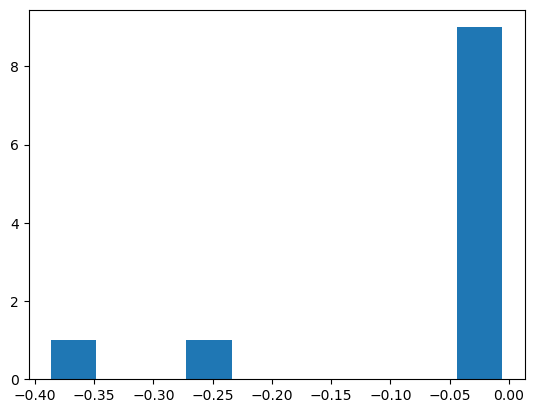

In [17]:
plt.hist(df_combo['Density g/cm3']-df_combo['Mean_Bulk_CO2dens_gcm3'])